# Annotation dotplots
# 10/8/2021 Chenqu

# 110821 Issac (Meg,Mye)

In [1]:
import scanpy as sc
import pandas as pd

# Load data

In [2]:
adata = sc.read_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
adata.var_names_make_unique()
adata.raw = adata.copy()

In [4]:
obs = pd.read_csv('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv', index_col = 0) # final annotations and removed maternal contaminant cells

/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
adata = adata[adata.obs_names.isin(obs.index)].copy()

/home/jovyan/my-conda-envs/workhorse/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
for col in obs:
    adata.obs[col] = obs[col] # use anno_lvl_2_final_clean

In [7]:
adata.obs['anno_lvl_2_final_clean'] = adata.obs['anno_lvl_2_final_clean'].astype('category')
adata.obs['anno_lvl_2_final']=adata.obs['anno_lvl_2_final'].astype('category')

# B cell marker gene plot

In [11]:
Bcell = adata[adata.obs['anno_lvl_2_final_clean'].isin(['LMPP_ELP','PRE_PRO_B','PRO_B','LATE_PRO_B','LARGE_PRE_B','SMALL_PRE_B','IMMATURE_B',
                                            'MATURE_B','CYCLING_B','B1','PLASMA_B'])]

In [12]:
Bcell.obs['anno_lvl_2_final_clean'] = Bcell.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['LMPP_ELP','PRE_PRO_B','PRO_B','LATE_PRO_B','LARGE_PRE_B','SMALL_PRE_B','IMMATURE_B',
                                            'MATURE_B','B1','PLASMA_B','CYCLING_B'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as c

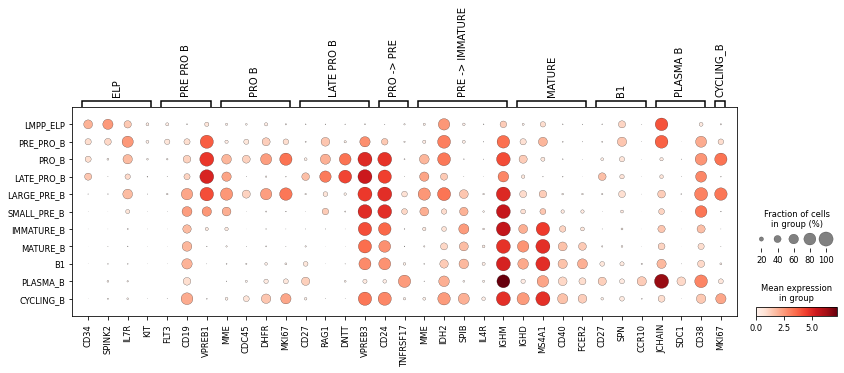

In [13]:
markers = {'ELP':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }
sc.pl.dotplot(Bcell, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=True, save='B_clean_anno.png')

# NKT/ILC marker genes

In [14]:
Tcell = adata[adata.obs['anno_lvl_2_final_clean'].isin(['DN(early)_T','DN(P)_T','DN(Q)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T',
                                                                          'CD4+T','TREG','CYCLING_T','CD8AA','TH17','ILC3','ILC2','CYCLING_ILC',
                                                                          'NK_T','NK','CYCLING_NK'])]

In [15]:
Tcell.obs['anno_lvl_2_final_clean'] = Tcell.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['DN(early)_T','DN(P)_T','DN(Q)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T',
                                                                          'CD4+T','TREG','CYCLING_T','CD8AA','TH17','ILC3','ILC2','CYCLING_ILC',
                                                                          'NK_T','NK','CYCLING_NK'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as c

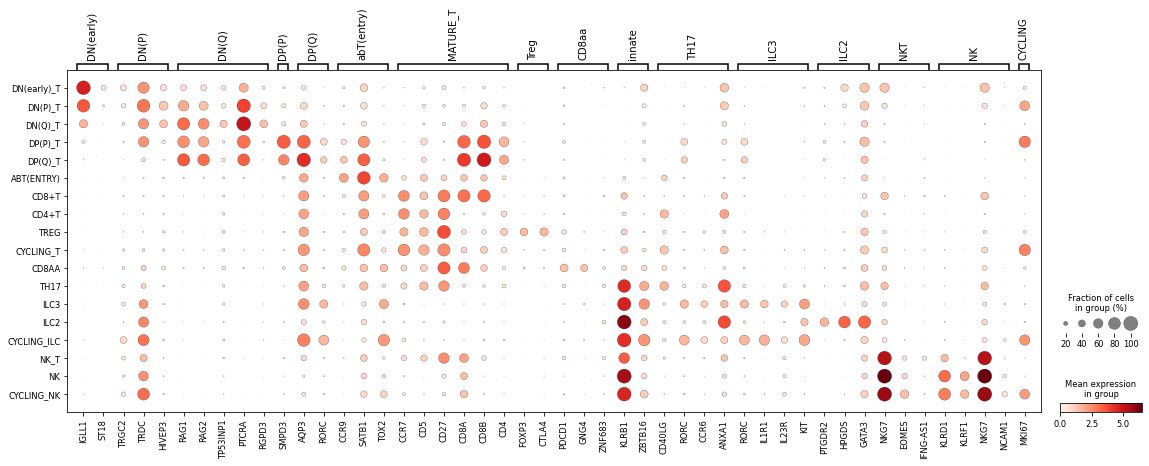

In [16]:
markers = {'DN(early)':['IGLL1','ST18'],
           'DN(P)':['TRGC2','TRDC','HIVEP3'],
           'DN(Q)':['RAG1','RAG2','TP53INP1','PTCRA','RGPD3'],
           'DP(P)':['SMPD3'], 
           'DP(Q)':['AQP3','RORC'], 
           'abT(entry)':['CCR9','SATB1','TOX2'], 
           'MATURE_T':['CCR7','CD5','CD27','CD8A','CD8B','CD4'], 
           #'agonist selection':['TNFRSF9','CD27','IKZF2','IKZF3'],
           'Treg':['FOXP3','CTLA4'], 
           'CD8aa':['PDCD1','GNG4','ZNF683'], 
           'innate':['KLRB1','ZBTB16'],
           'TH17':['CD40LG','RORC','CCR6','ANXA1'],
           'ILC3': ['RORC','IL1R1','IL23R','KIT'],
           'ILC2':['PTGDR2','HPGDS','GATA3'],
           'NKT':['NKG7','EOMES','IFNG-AS1'],
           'NK': ['KLRD1','KLRF1','NKG7','NCAM1'],
           'CYCLING':['MKI67'],
          }
sc.pl.dotplot(Tcell, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='T_clean_anno.png')

# Progenitor marker genes

In [17]:
progenitor = adata[adata.obs['anno_lvl_2_final_clean'].isin(['HSC_MPP', 'CYCLING_MPP', 'LMPP_ELP','PRE_PRO_B', 'DN(early)_T','DN(P)_T', 
                                                                                                  'MEMP','CYCLING_MEMP', 'MEP', 'EARLY_MK', 'DOUBLET_ERY_B', 
                                                                                                  'CMP', 'GMP',  'PROMONOCYTE', 'PROMYELOCYTE'])]

In [18]:
progenitor.obs['anno_lvl_2_final_clean'] = progenitor.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['HSC_MPP', 'CYCLING_MPP', 'LMPP_ELP','PRE_PRO_B', 'DN(early)_T','DN(P)_T', 
                                                                                                  'MEMP','CYCLING_MEMP', 'MEP', 'EARLY_MK', 'DOUBLET_ERY_B', 
                                                                                                  'CMP', 'GMP',  'PROMONOCYTE', 'PROMYELOCYTE'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as c

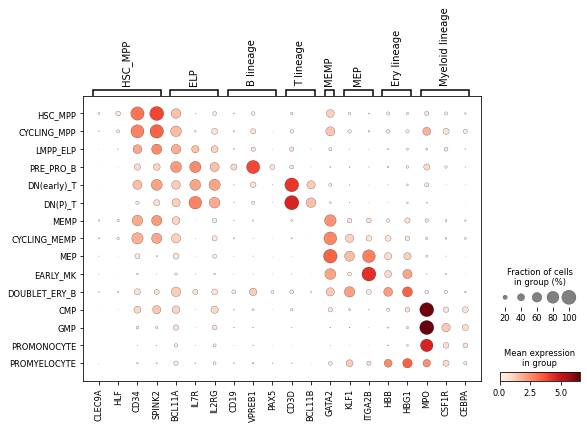

In [19]:
markers = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'ELP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }
sc.pl.dotplot(progenitor, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='progenitor_clean_anno.png')

# Stroma marker genes

In [32]:
stroma = adata[adata.obs['anno_lvl_2_final_clean'].isin(['FIBROBLAST_CLUST12', 'FIBROBLAST_CLUST31','FIBROBLAST_CLUST53',
                                                         'GUT_FIBROBLAST_CLUST27','GUT_FIBROBLAST_CLUST4', 'GUT_FIBROBLAST_CLUST6',
                                                         'SKIN_FIBROBLAST_CLUST1','SKIN_FIBROBLAST_CLUST2', 'SKIN_FIBROBLAST_CLUST22',
                                                         'SKIN_FIBROBLAST_CLUST24', 'SKIN_FIBROBLAST_CLUST25','SKIN_FIBROBLAST_CLUST29', 
                                                         'SKIN_FIBROBLAST_CLUST30','SKIN_FIBROBLAST_CLUST8','SPLENIC_FIBROBLAST_CLUST0',
                                                         'SPLENIC_FIBROBLAST_CLUST26', 'CYCLING_FIBROBLAST_CLUST15','CYCLING_FIBROBLAST_CLUST17', 
                                                         'MYOFIBROBLAST','GUT_MYOFIBROBLAST','MESENCHYMAL_LYMPHOID_TISSUE_ORGANISER','MUSCLE_SATELLITE',
                                                         'SKELETAL_MUSCLE',  'SMOOTH_MUSCLE', 'MESOTHELIUM','OSTEOBLAST','CHONDROCYTE', 'GLIAL','NEURON', 
                                                         'MELANOCYTE','KERATINOCYTE','HEPATOCYTE_CLUST16',
                                                         'HEPATOCYTE_CLUST33', 'HEPATOCYTE-LIKE', 'DEVELOPING_NEPHRON_CLUST21','DEVELOPING_NEPHRON_CLUST38',
                                                         'GUT_EPITHELIUM_CLUST10','GUT_EPITHELIUM_CLUST32',  'YS_STROMA','CYCLING_EPITHELIUM',
                                                         'INTERSTITIAL_CELLS_OF_CAJAL', 'ENTEROENDOCRINE_CLUST46','ENTEROENDOCRINE_CLUST52', 
                                                         'ENDOTHELIUM_CLUST11','ENDOTHELIUM_CLUST42', 'ENDOTHELIUM_CLUST45', 'ENDOTHELIUM_CLUST5',
                                                         'ENDOTHELIUM_CLUST9', 'VSMC/PERICYTE', 'HEPATIC_VSMC/PERICYTE', 'KIDNEY_VSMC/PERICYTE',
                                                         'PERIVASCULAR_MACROPHAGE', 'DOUBLET_ENDOTHELIUM_ERYTHROCYTE', 'DOUBLET_IMMUNE_FIBROBLAST'
])]

In [33]:
stroma.obs['anno_lvl_2_final_clean'] = stroma.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['FIBROBLAST_CLUST12', 'FIBROBLAST_CLUST31','FIBROBLAST_CLUST53',
                                                         'GUT_FIBROBLAST_CLUST27','GUT_FIBROBLAST_CLUST4', 'GUT_FIBROBLAST_CLUST6',
                                                         'SKIN_FIBROBLAST_CLUST1','SKIN_FIBROBLAST_CLUST2', 'SKIN_FIBROBLAST_CLUST22',
                                                         'SKIN_FIBROBLAST_CLUST24', 'SKIN_FIBROBLAST_CLUST25','SKIN_FIBROBLAST_CLUST29', 
                                                         'SKIN_FIBROBLAST_CLUST30','SKIN_FIBROBLAST_CLUST8','SPLENIC_FIBROBLAST_CLUST0',
                                                         'SPLENIC_FIBROBLAST_CLUST26', 'CYCLING_FIBROBLAST_CLUST15','CYCLING_FIBROBLAST_CLUST17', 
                                                         'MYOFIBROBLAST','GUT_MYOFIBROBLAST','MESENCHYMAL_LYMPHOID_TISSUE_ORGANISER','MUSCLE_SATELLITE',
                                                         'SKELETAL_MUSCLE',  'SMOOTH_MUSCLE', 'MESOTHELIUM','OSTEOBLAST','CHONDROCYTE', 'GLIAL','NEURON', 
                                                         'MELANOCYTE','KERATINOCYTE','HEPATOCYTE_CLUST16',
                                                         'HEPATOCYTE_CLUST33', 'HEPATOCYTE-LIKE', 'DEVELOPING_NEPHRON_CLUST21','DEVELOPING_NEPHRON_CLUST38',
                                                         'GUT_EPITHELIUM_CLUST10','GUT_EPITHELIUM_CLUST32',  'YS_STROMA','CYCLING_EPITHELIUM',
                                                         'INTERSTITIAL_CELLS_OF_CAJAL', 'ENTEROENDOCRINE_CLUST46','ENTEROENDOCRINE_CLUST52', 
                                                         'ENDOTHELIUM_CLUST11','ENDOTHELIUM_CLUST42', 'ENDOTHELIUM_CLUST45', 'ENDOTHELIUM_CLUST5',
                                                         'ENDOTHELIUM_CLUST9', 'VSMC/PERICYTE', 'HEPATIC_VSMC/PERICYTE', 'KIDNEY_VSMC/PERICYTE',
                                                         'PERIVASCULAR_MACROPHAGE', 'DOUBLET_ENDOTHELIUM_ERYTHROCYTE', 'DOUBLET_IMMUNE_FIBROBLAST'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_1_STROMA' as categorical
... storing 'anno_lvl_2_STROMA' as 

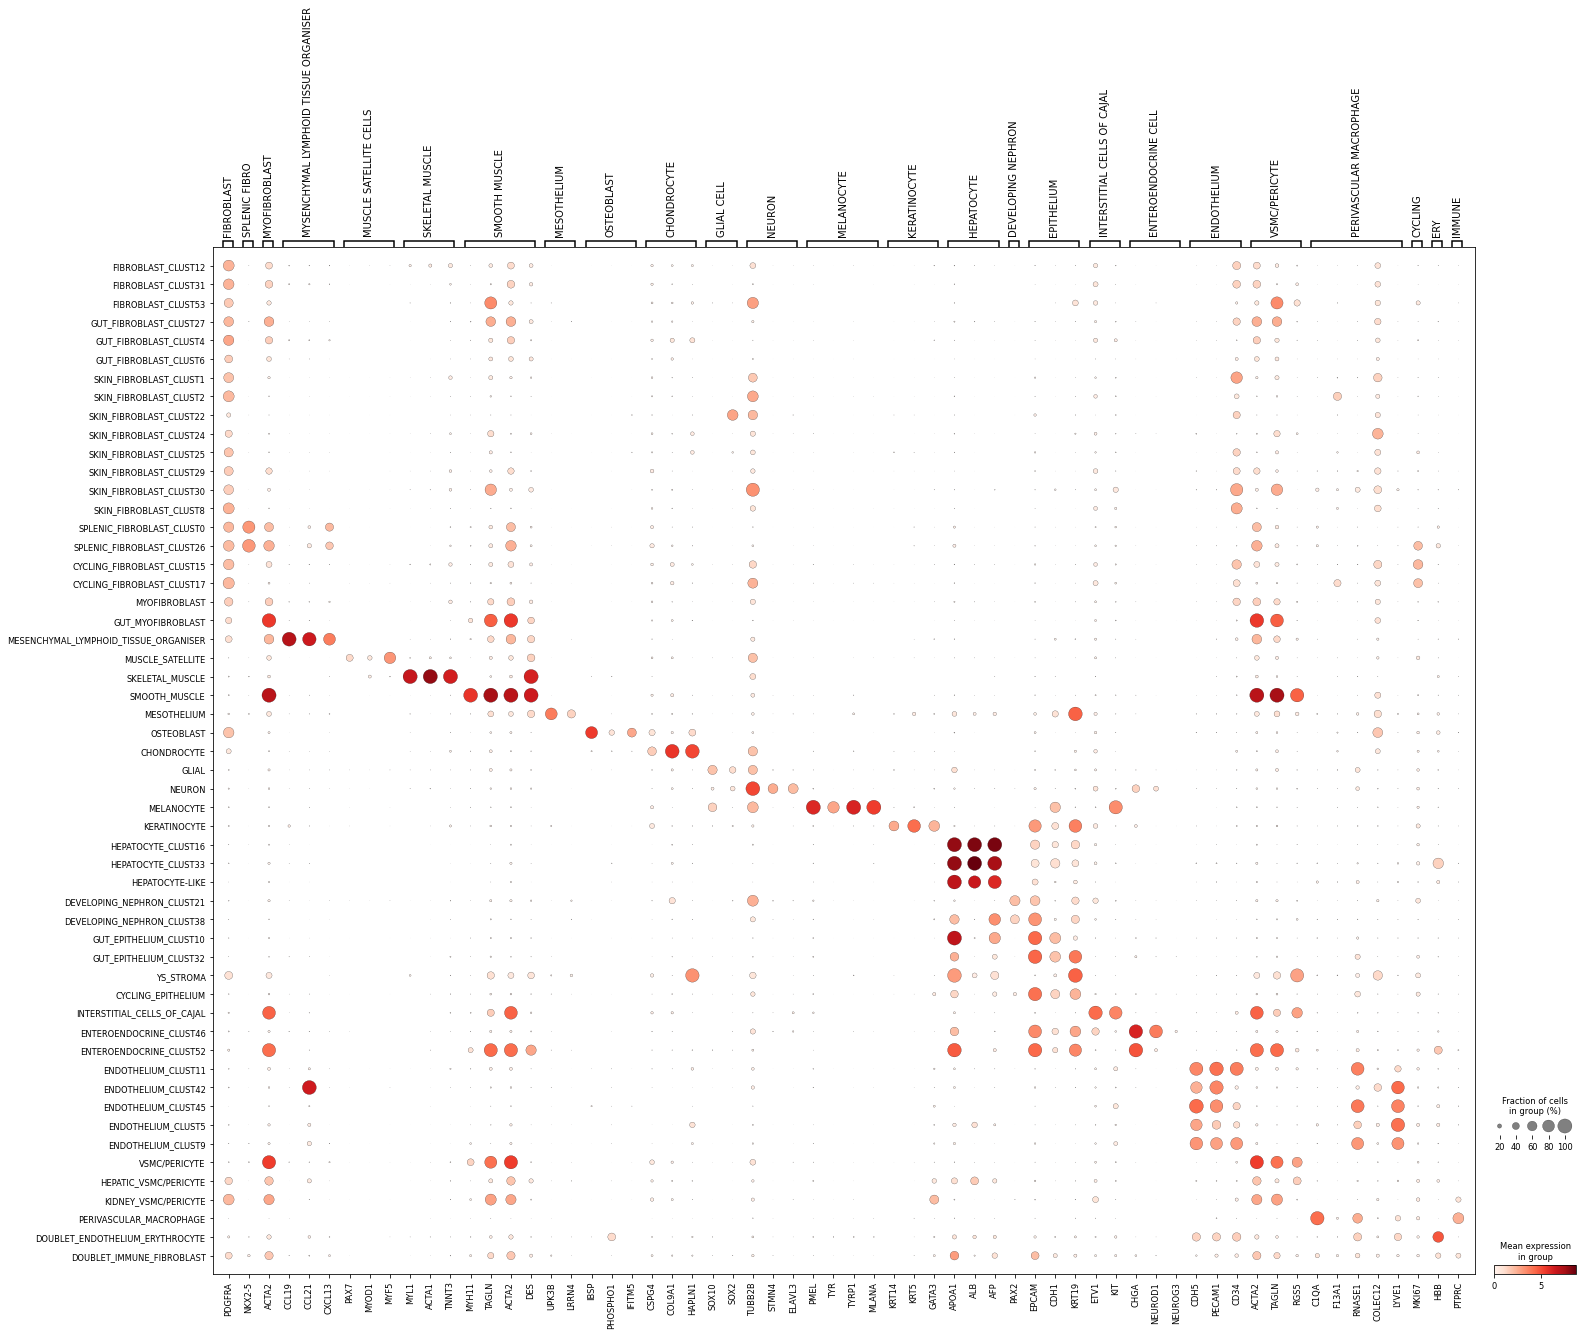

In [35]:
markers = {'FIBROBLAST':['PDGFRA'],
           'SPLENIC FIBRO':['NKX2-5'],
           'MYOFIBROBLAST':['ACTA2'],
           'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
           'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
           'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
           'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
           'MESOTHELIUM':['UPK3B','LRRN4'],
           'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
           'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON':['TUBB2B','STMN4','ELAVL3'],
           'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
           'KERATINOCYTE':['KRT14','KRT5','GATA3'],
           'HEPATOCYTE':['APOA1','ALB','AFP'],
           'DEVELOPING NEPHRON':['PAX2'],
           'EPITHELIUM':['EPCAM','CDH1','KRT19'],
           'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
           'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           #'TIP EC':['VIM','PODXL','IL32','KDR'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'PERIVASCULAR MACROPHAGE':['C1QA','F13A1','RNASE1','COLEC12','LYVE1'],
           'CYCLING':['MKI67'],
           'ERY':['HBB'],
           'IMMUNE':['PTPRC']
          }
sc.pl.dotplot(stroma, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='stroma_clean_anno.png')

# Ery/Mega

In [10]:
adata.X

<908178x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 2059061010 stored elements in Compressed Sparse Row format>

In [12]:
del adata.raw

In [15]:
import gc
gc.collect()

677

In [16]:
adata

AnnData object with n_obs × n_vars = 908178 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'anno_lvl_1_LYMPHOID', 'anno_lvl_2_LYMPHOID', 'anno_lvl_1_MYELOID', 'anno_lvl_2_MYELOID', 'anno_lvl_1_MEM_PROGENITORS', 'anno_lvl_2_MEM_PROGENITORS', 'is_annotated', 'is_uniquely_annotated', 'anno_lvl_2_final', 'anno_lvl_1_STROMA', 'anno_lvl_2_STROMA', 'anno_lvl_2_final_clean'
    var: 'GeneID', 'GeneName'

In [22]:
list(adata.obs['anno_lvl_2_final_clean'].unique())

['DC3',
 'EARLY_ERY',
 'DC2',
 'LARGE_PRE_B',
 'DC1',
 'DOUBLET_IMMUNE_FIBROBLAST',
 'LOW_Q_INCONSISTENT',
 'MEMP',
 'DOUBLET_LYMPHOID_MACROPHAGE',
 'ENDOTHELIUM_CLUST11',
 'CYCLING_T',
 'EARLY_MK',
 'VSMC/PERICYTE',
 'PROLIFERATING_MACROPHAGE',
 'EO/BASO/MAST',
 'PRE_PRO_B',
 'pDC',
 'PRO_B',
 'GMP',
 'CD14_MONO',
 'ENDOTHELIUM_CLUST42',
 'CD14+_MACROPHAGE',
 'CD4+T',
 'CD8+T',
 'PROMYELOCYTE',
 'CYCLING_FIBROBLAST_CLUST15',
 'SKIN_FIBROBLAST_CLUST1',
 'PERIVASCULAR_MACROPHAGE',
 'MELANOCYTE',
 'CYCLING_B',
 'TREG',
 'MYOFIBROBLAST',
 'LMPP_ELP',
 'NK',
 'OLFML3+_MICROGLIA',
 'CYCLING_NK',
 'ILC3',
 'PROMONOCYTE_(PROLIFERATING)',
 'CD16+_MACROPHAGE',
 'ILC2',
 'SMALL_PRE_B',
 'SKIN_FIBROBLAST_CLUST8',
 'CYCLING_FIBROBLAST_CLUST17',
 'MATURE_B',
 'KERATINOCYTE',
 'SKIN_FIBROBLAST_CLUST25',
 'B1',
 'SKIN_FIBROBLAST_CLUST2',
 'NEUTROPHIL',
 'CYCLING_ILC',
 'GLIAL',
 'NK_T',
 'IMMATURE_B',
 'LOW_QUALITY',
 'PROMONOCYTE',
 'LATE_PRO_B',
 'YS_MACROPHAGE',
 'SKIN_FIBROBLAST_CLUST22',
 'HIGH_

In [27]:
ery_names = [
 'EARLY_ERY',
 'EARLY_MK',
 'MID_ERY',
 'LATE_ERY',
 'LATE_MK',
 'YS_ERY',
 'CYCLING_YS_ERY',]

In [28]:
ery = adata[adata.obs['anno_lvl_2_final_clean'].isin(ery_names)]

In [30]:
ery.obs['anno_lvl_2_final_clean'] = ery.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['YS_ERY','CYCLING_YS_ERY','EARLY_ERY', 'MID_ERY', 'LATE_ERY', 'EARLY_MK', 'LATE_MK'])

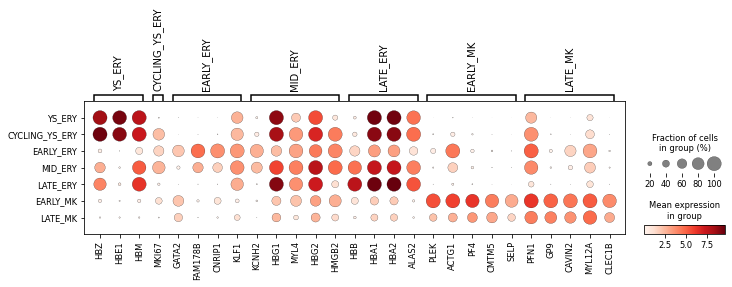

In [49]:
markers = {'YS_ERY':['HBZ','HBE1','HBM'],
           'CYCLING_YS_ERY':['MKI67'],
           'EARLY_ERY':[ 'GATA2','FAM178B','CNRIP1','KLF1'], 
           'MID_ERY':['KCNH2', 'HBG1','MYL4', 'HBG2', 'HMGB2'], 
           'LATE_ERY':['HBB','HBA1','HBA2', 'ALAS2'], 
           'EARLY_MK':['PLEK','ACTG1','PF4', 'CMTM5', 'SELP'], 
           'LATE_MK':['PFN1','GP9','CAVIN2','MYL12A','CLEC1B'],
          }
sc.pl.dotplot(ery, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='ERY_clean_anno.png')

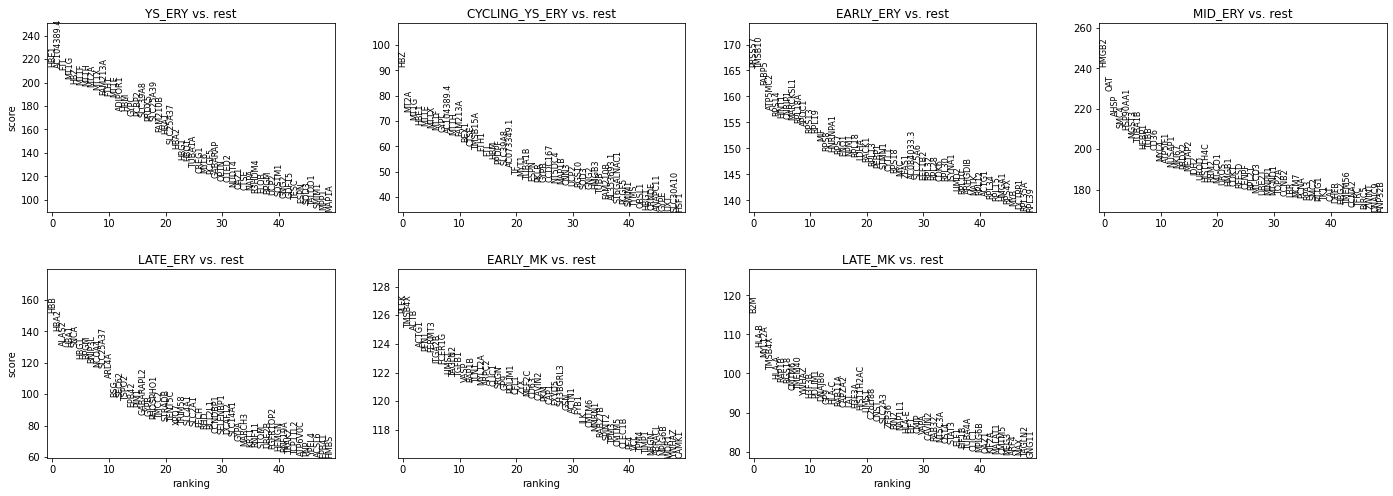

In [34]:
sc.tl.rank_genes_groups(ery, "anno_lvl_2_final_clean", method='wilcoxon',n_genes=50)
sc.pl.rank_genes_groups(ery, n_genes=50, sharey=False)

result = ery.uns['rank_genes_groups']
groups = result['names'].dtype.names
DE = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals','logfoldchanges']}).head(50)
degs = DE[:]
DE.to_csv('./ery_220721_anno_lvl_2_final_clean_DEGS.csv')

In [50]:
ery.write('./ery_markers.h5ad')

In [ ]:
ERY = {
"HSC_MPP":["SPINK2","HOPX",	"CYTL1","MLLT3","CD34"],
"Cycling_MPP":["SPINK2","HOPX","MKI67"],
"PRE_PRO_B":['CD22', 'ZCCHC7', 'CD24','SPINK2','VPREB1','MS4A1'],
'OLFML3+_Microglia': ["OLFML3","HTRA1","FRZB","LUM","DCN"],
"Early_MK":['PF4', 'CMTM5', 'SELP'],
"late_MK":['CAVIN2','TUBB1','NRGN','CLEC1B','CMTM5', 'ITGA2B', 'PF4']
"MEMP":['GATA2', 'FCER1A', 'PRSS57','HBD','CNRIP1','CKB'],
"Early_ERY":['KLF1', 'GATA2','FAM178B','CNRIP1'],
"Mid_ERY":[ 'KCNH2', 'HBG1','MYL4', 'HBG2', 'AHSP'],#'GIHCG'
"Late_ERY":['HBG1', 'GYPA', 'GYPB', 'SLC4A1'] #GYPA, HBG2, GYPB, HBG1, ALAS2, HBM, SLC4A1, HBA2, HBA1, AHSP
"YS_ERY" : ['HBZ','HBE1'],
"Cycling_YS_ERY" : ['HBZ','HBE1','MKI67','TYMS'],
"Placental_contaminents":['KISS1','CGA','S100P','HPOX','TFPI2']
"VSMC":['PDGFRA', 'TAGLN', 'MYH11', 'ACTA2', 'NOTCH3' , 'EDNRA',],
"DOUBLETS_FIBRO_ERY":["PDFRB","HBG1","PDGFRA"],
"EC":['CDH1','KRT8','EPCAM'],
"LOW_QUALITY_MID_ERY_(HIGH_RIBO)":['RPL14','RPL35','RPL21'],
"Promyelocyte":["CSTA","RNASE2","CLEC11A","MPO","AZU1","ELANE","LYZ",],

# Myeloid

In [59]:
mye_names =['DC3',
 'DC2',
 'DC1',
 'PROLIFERATING_MACROPHAGE',
 'EO/BASO/MAST',
 'pDC',
 'CD14_MONO',
 'CD14+_MACROPHAGE',
 'PROMYELOCYTE',
 'PERIVASCULAR_MACROPHAGE',
 'OLFML3+_MICROGLIA',
 'PROMONOCYTE_(PROLIFERATING)',
 'CD16+_MACROPHAGE',
 'NEUTROPHIL',
 'GLIAL',
 'PROMONOCYTE',
 'YS_MACROPHAGE',
 'BM_CD14_MONO',
 'ERY_MACROPHAGE',
 'KUPFFER_RP_MACROPHAGE',
 'PROLIFERATING_KUPFFER_RP_MACROPHAGE',
 'YS_ERY_MACROPHAGE',
 'SPLENIC_MACROPHAGE',
 'OSTEOCLAST',]

In [60]:
mye = adata[adata.obs['anno_lvl_2_final_clean'].isin(mye_names)]

In [71]:
mye.write('./mye_markers.h5ad')

In [2]:
mye = sc.read('./mye_markers.h5ad')

In [4]:
mye.obs['anno_lvl_2_final_clean'] = mye.obs['anno_lvl_2_final_clean'].cat.reorder_categories([
 'DC1',
 'DC2',
'DC3',
 'pDC',
 'PROMONOCYTE',
 'PROMONOCYTE_(PROLIFERATING)',
 'BM_CD14_MONO',
 'CD14_MONO',
 'CD14+_MACROPHAGE',
 'CD16+_MACROPHAGE',
 'YS_MACROPHAGE',
 'SPLENIC_MACROPHAGE',
 'PERIVASCULAR_MACROPHAGE',
 'KUPFFER_RP_MACROPHAGE',
 'PROLIFERATING_KUPFFER_RP_MACROPHAGE',
 'PROLIFERATING_MACROPHAGE',
 'YS_ERY_MACROPHAGE',
 'ERY_MACROPHAGE',
 'PROMYELOCYTE',
 'NEUTROPHIL',
 'EO/BASO/MAST',
 'GLIAL',
 'OLFML3+_MICROGLIA',
 'OSTEOCLAST'])

Trying to set attribute `.uns` of view, copying.


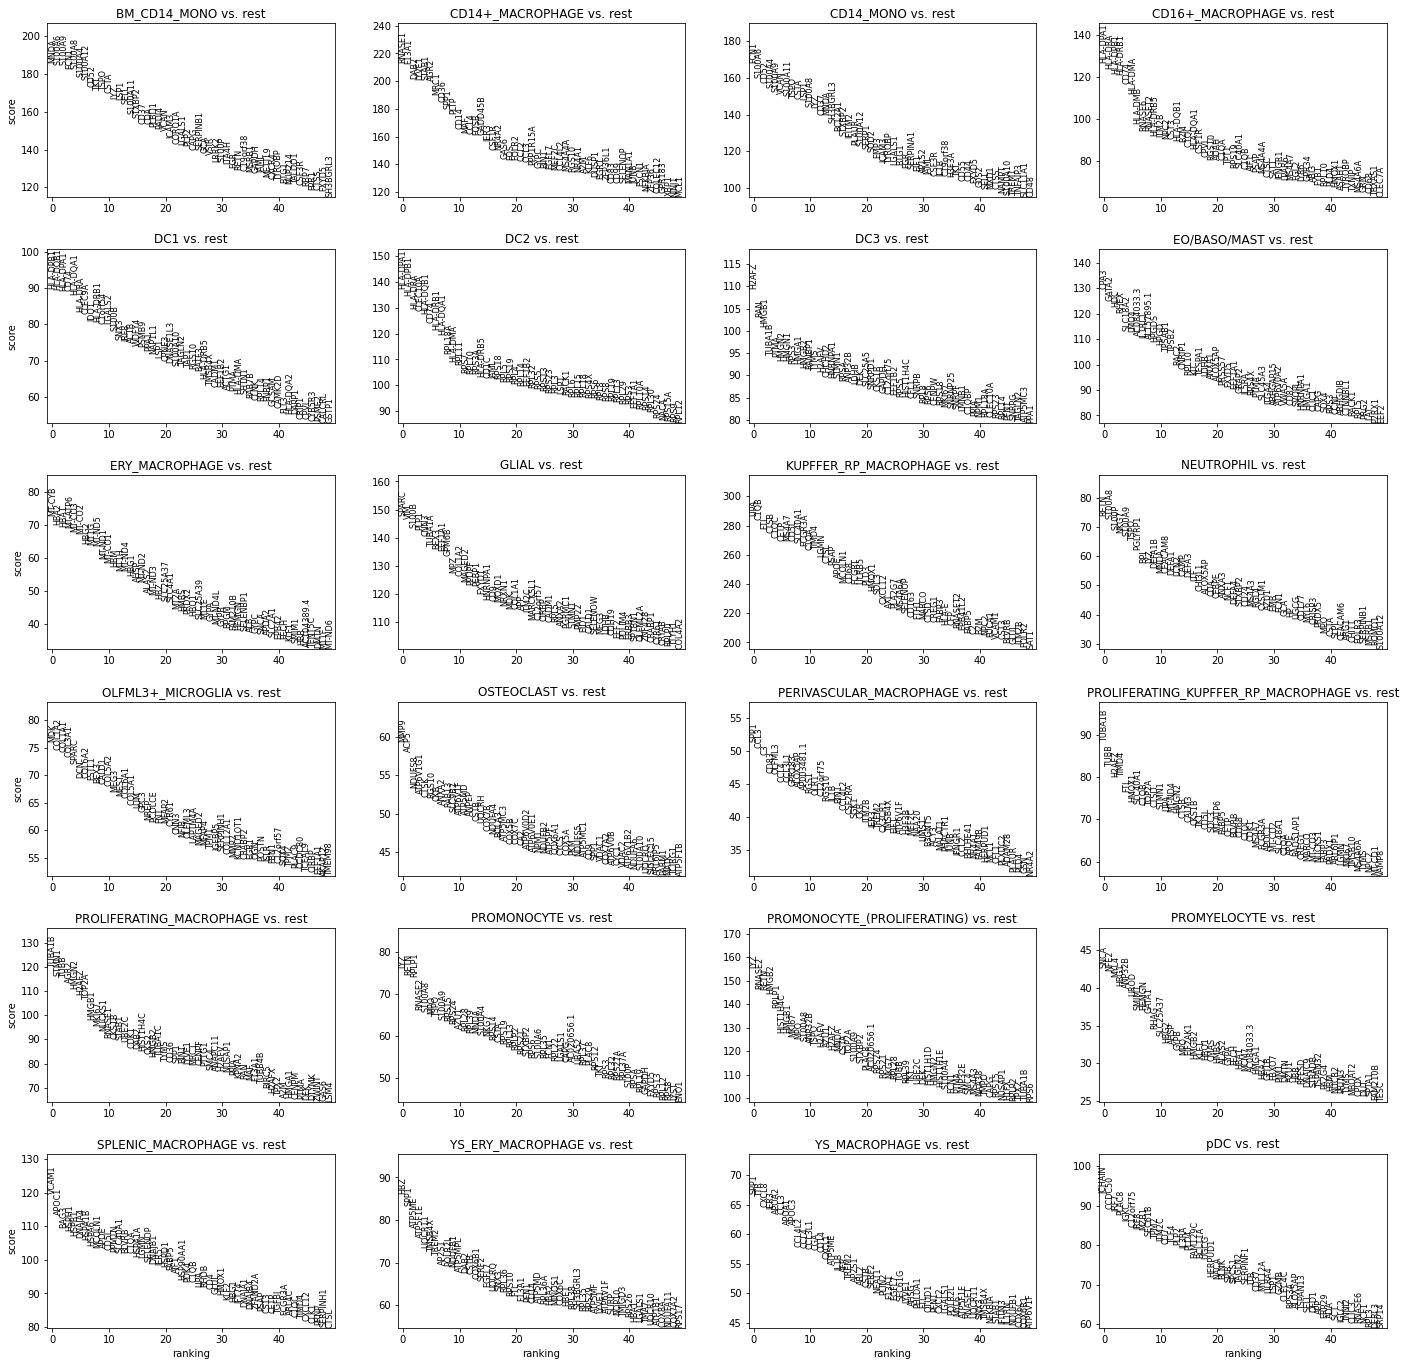

In [61]:
sc.tl.rank_genes_groups(mye, "anno_lvl_2_final_clean", method='wilcoxon',n_genes=50)
sc.pl.rank_genes_groups(mye, n_genes=50, sharey=False)

result = mye.uns['rank_genes_groups']
groups = result['names'].dtype.names
DE = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals','logfoldchanges']}).head(50)
degs = DE[:]
DE.to_csv('./mye_160821_anno_lvl_2_final_clean_DEGS.csv')

In [ ]:
'CD16+_Macrophage': ['FCGR3A','RNASE1', 'DAB2', 'LYVE1','CD163','HLA-DRA'],
'CD14+_Macrophage': ['CD14','CD163'],
'CD14_mono':['CD14','VCAN',"CD36","CD52","FCN1",'ITGAX'],
"DC1":["PCNA","CLEC9A","BATF3","CADM1"],
"DC2":["CD1C","HLA-DRB5","CLEC10A","ITGAX"],
"DC3":["S100A4","S100A6","CST3","RETN","NKG7","CD14",'VCAN','CD163'],
"HSC":["SPINK2","HOPX",	"CYTL1","MLLT3","CD34"], 
'OLFML3+_Microglia': ["OLFML3","HTRA1","BHLHE41"],
'Osteoclast' : ['CTSK','ACP5','MMP9','SIGLEC15','CD68'],
'Proliferating_Macrophage': ['CD14','CD163','MKI67'],
"Promonocyte":["S100A4","S100A6","FCGR1A","CST3","LYZ","FCN1",'MNDA'],
"EO":["IL5RA","CCR3","SIGLEC8"],
"BASO":["IL3RA","PTGDR2","ENPP3","FCER1A"],
"MAST":["KIT","CD63","MITF"],
'neutrophil': ['S100A8', 'RETN', 'S100P','GZMB'],
'ys_Mac': ['SPP1', 'TTR', 'CXCL8']

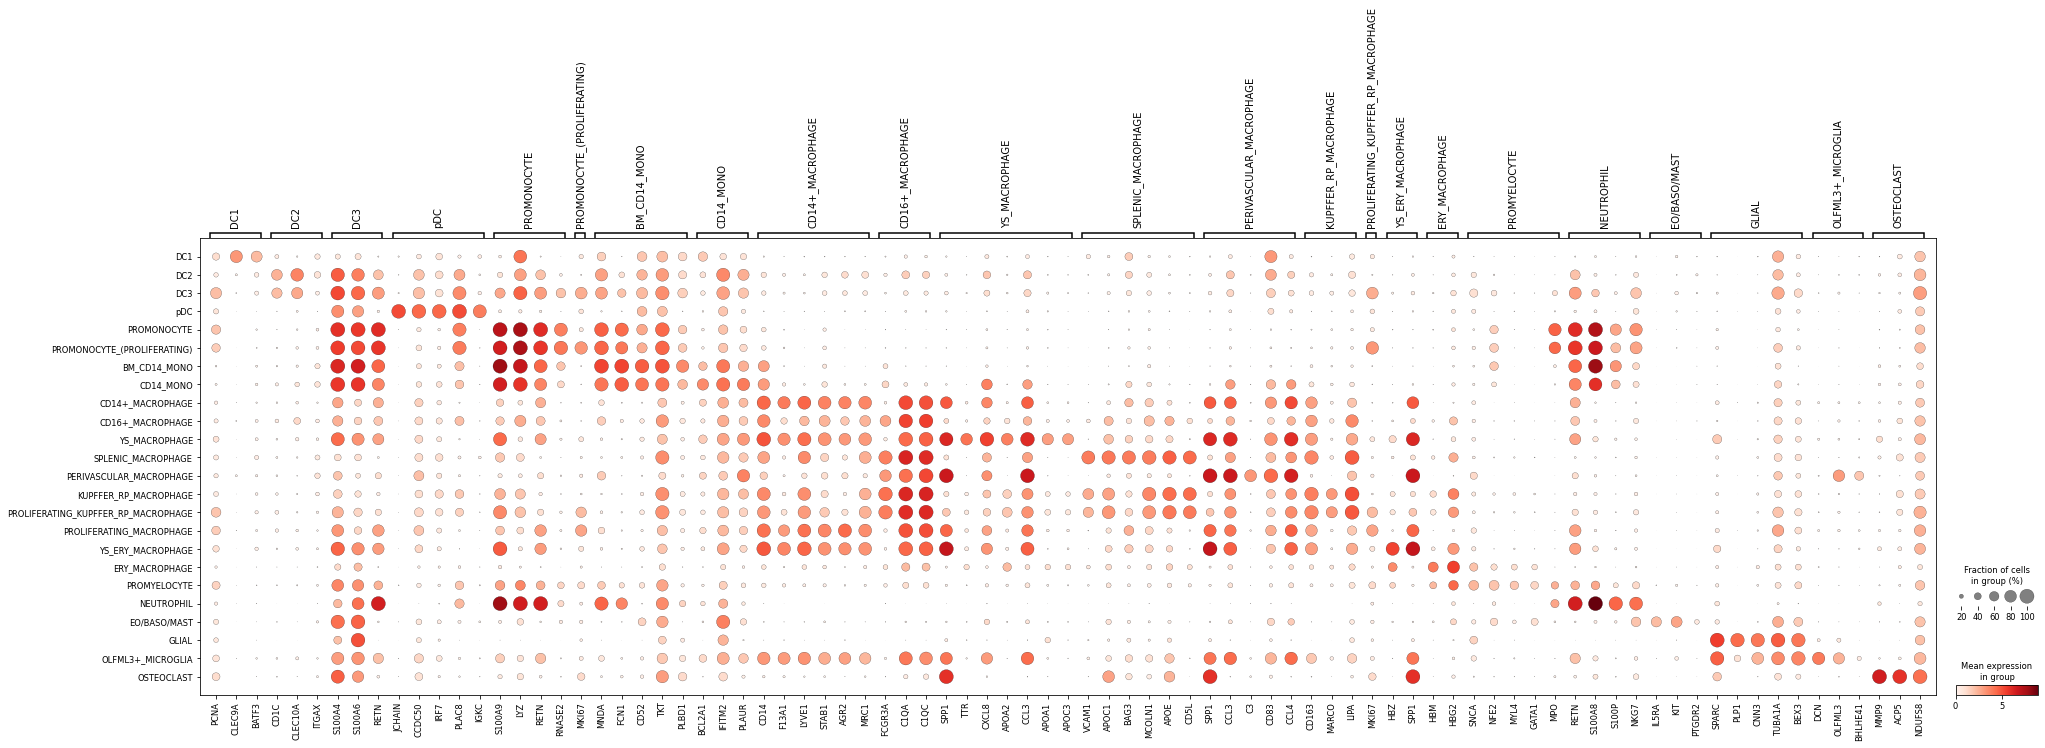

In [10]:
markers = {
'DC1':["PCNA","CLEC9A","BATF3",],
 'DC2':['CD1C',"CLEC10A","ITGAX"],
'DC3':["S100A4","S100A6","RETN"],
 'pDC':["JCHAIN","CCDC50","IRF7","PLAC8","IGKC",],
 'PROMONOCYTE':['S100A9','LYZ','RETN','RNASE2'],
 'PROMONOCYTE_(PROLIFERATING)':['MKI67'],
 'BM_CD14_MONO':['MNDA','FCN1','CD52','TKT','PLBD1'],
 'CD14_MONO':['BCL2A1','IFITM2','PLAUR'],
 'CD14+_MACROPHAGE':['CD14','F13A1',"LYVE1","STAB1","AGR2","MRC1",],
 'CD16+_MACROPHAGE':['FCGR3A','C1QA','C1QC'],
 'YS_MACROPHAGE':["SPP1","TTR","CXCL8","APOA2","CCL3","APOA1","APOC3",],
 'SPLENIC_MACROPHAGE':["VCAM1","APOC1","BAG3","MCOLN1","APOE","CD5L"],
 'PERIVASCULAR_MACROPHAGE':['SPP1','CCL3','C3','CD83','CCL4'],
 'KUPFFER_RP_MACROPHAGE':['CD163','MARCO','LIPA'],
 'PROLIFERATING_KUPFFER_RP_MACROPHAGE':['MKI67'],
 #'PROLIFERATING_MACROPHAGE':[],
 'YS_ERY_MACROPHAGE':['HBZ','SPP1'],
 'ERY_MACROPHAGE':['HBM','HBG2'],
 'PROMYELOCYTE':['SNCA','NFE2','MYL4','GATA1','MPO'],
 'NEUTROPHIL':["RETN",	"S100A8",	"S100P",	"NKG7",],
 'EO/BASO/MAST':["IL5RA","KIT",'PTGDR2'],
 'GLIAL':["SPARC",	"PLP1",	"CNN3",	"TUBA1A",	"BEX3",],
 'OLFML3+_MICROGLIA':['DCN','OLFML3',"BHLHE41"],
 'OSTEOCLAST':['MMP9','ACP5','NDUFS8'],
          }
sc.pl.dotplot(mye, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='MYE_clean_anno.png')

In [66]:
# color scheme for 
cmap = 'RdYlBu_r'
# coor for color
'https://github.com/emdann/Pan_fetal_immune/blob/master/metadata/organ_colors.csv'
#Helvetica for plots

'https://github.com/emdann/Pan_fetal_immune/blob/master/metadata/organ_colors.csv'

In [11]:
adata

NameError: name 'adata' is not defined

In [69]:
list(adata.obs.columns)

['n_counts',
 'n_genes',
 'file',
 'mito',
 'doublet_scores',
 'predicted_doublets',
 'name',
 'uniform_label',
 'uniform_label_expanded_merged',
 'uniform_label_lvl0',
 'organ',
 'Sample.lanes',
 'Sort_id',
 'age',
 'method',
 'donor',
 'sex',
 'Processing_method',
 'AnnatomicalPart',
 'Sample',
 'anno_lvl_1_LYMPHOID',
 'anno_lvl_2_LYMPHOID',
 'anno_lvl_1_MYELOID',
 'anno_lvl_2_MYELOID',
 'anno_lvl_1_MEM_PROGENITORS',
 'anno_lvl_2_MEM_PROGENITORS',
 'is_annotated',
 'is_uniquely_annotated',
 'anno_lvl_2_final',
 'anno_lvl_1_STROMA',
 'anno_lvl_2_STROMA',
 'anno_lvl_2_final_clean']

In [86]:
adata.obs.to_csv('./170821_updated_metadata.csv')

In [ ]:
#Chenqu Suo
['F13A1', 'RNASE1','COLEC12','LYVE1' # perivascular macrophage, markers from Cao et al.